<a href="https://colab.research.google.com/github/AYOUBSEDDOUKI/AYOUBSEDDOUKI/blob/main/RIDGE_LASSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import sklearn.datasets as dts

In [ ]:
data = dts.load_diabetes()

In [ ]:
data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [ ]:
Y = pd.DataFrame(data.target,columns=["MEDV"])
Y=Y["MEDV"]
Y = (Y - np.mean(Y))/np.std(Y)
Y = Y.to_numpy()

In [ ]:
# redimensionner y
Y = Y.reshape(Y.shape[0], 1)

In [ ]:
Y.shape

(442, 1)

In [ ]:
data.data
X = pd.DataFrame(data.data ,columns=data.feature_names)
one = np.ones(Y.shape) 
X.insert(10,'one',one)
X=X.to_numpy()

In [ ]:
print("le type de X est : ",type(X))
print("le type de Y est : ",type(Y))

le type de X est :  <class 'numpy.ndarray'>
le type de Y est :  <class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
#repartie la base de donnees
Xtrain,Xtest,Ytrain,Ytest=tts(X,Y,test_size=20,random_state=40)

In [ ]:
Xtrain.shape

(422, 11)

In [ ]:
Ytrain.shape

(422, 1)

In [ ]:
l = 1.2067926406393288

In [ ]:
Q1 = Xtrain.T.dot(Xtrain)
Q2 = l * np.identity(n=11)
Q3 = (Q1 + Q2)
Q4 = np.linalg.inv(Q3)
Q5 = Q4.dot(Xtrain.T)
Q6 = Q5.dot(Ytrain)


In [ ]:
Q6

array([[ 0.55437969],
       [-0.91359994],
       [ 3.63176252],
       [ 2.60431718],
       [ 0.01785916],
       [-0.35372154],
       [-1.94603499],
       [ 1.45745928],
       [ 3.10831709],
       [ 1.32070255],
       [-0.00414764]])

In [ ]:
print(Q6.shape)
print(X.shape)


(11, 1)
(442, 11)


In [ ]:
predict = X.dot(Q6)

In [ ]:
predict

In [ ]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta = np.random.randn(11, 1)
theta.shape

(11, 1)

In [ ]:
def model(X, theta):
    return X.dot(theta)

In [ ]:
def cost_function(X, y, theta):
    m=y.shape[0]
    return (np.sum((model(X, theta) - y)**2))/m    

In [ ]:
def grad(X, y, theta,lamda):
  return ((X.T.dot(model(X, theta) - y)) + lamda*theta)

In [ ]:
def gradL(X, y, theta,lamda):
  return ((X.T.dot(model(X, theta) - y)) + lamda)

In [ ]:
from numpy.core.numeric import array_equal
def gradient_descent(X, y, theta, learning_rate, n_iterations,lamda):  
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta,lamda)  
    return theta

In [ ]:
from numpy.core.numeric import array_equal
def gradient_descentL(X, y, theta, learning_rate, n_iterations,lamda):  
    for i in range(0, n_iterations):
        theta = theta - learning_rate * gradL(X, y, theta,lamda)  
    return theta

In [ ]:
lamdas = np.logspace(-4,4,50)
n_iterations = 10000
learning_rate = 0.001

In [ ]:
print(Xtrain.shape)
print(Ytrain.shape)
print(theta.shape)
print(lamdas.shape)

(422, 11)
(422, 1)
(11, 1)
(50,)


In [ ]:
# création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
cost_history=[]
wsR=[]
emin=10000
w_optR=[]
l_minR=0
for l in lamdas:
  w = gradient_descent(Xtrain, Ytrain, theta, learning_rate, n_iterations,l)
  e = cost_function(Xtest, Ytest, w)
  cost_history.append(e)
  wsR.append(w)
  if(e<emin):
    emin = e
    w_optR=w
    l_minR=l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.


In [ ]:
# création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
cost_historyL=[]
wsL=[]
eminL=10000
w_optL=[]
l_minL=0
for l in lamdas:
  w = gradient_descentL(Xtrain, Ytrain, theta, learning_rate, n_iterations,l)
  e = cost_function(Xtest, Ytest, w)
  cost_historyL.append(e)
  wsL.append(w)
  if(e<eminL):
    eminL = e
    w_optL=w
    l_minL=l

In [ ]:
w_optR

array([[ 0.55437974],
       [-0.91359991],
       [ 3.63176271],
       [ 2.60431721],
       [ 0.01786551],
       [-0.3537274 ],
       [-1.94603684],
       [ 1.4574601 ],
       [ 3.10831426],
       [ 1.32070254],
       [-0.00414764]])

In [ ]:
print(cost_function(Xtest, Ytest, w_optR))
print(l_minR)

1.0227491819299617
1.2067926406393288


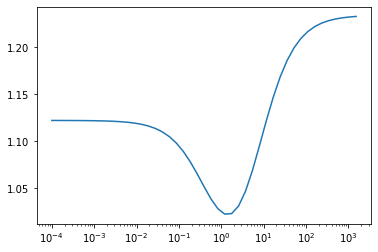

In [ ]:
import matplotlib.pyplot as ppt
f = ppt.gca()
f.plot(lamdas,cost_history)
f.set_xscale('log')

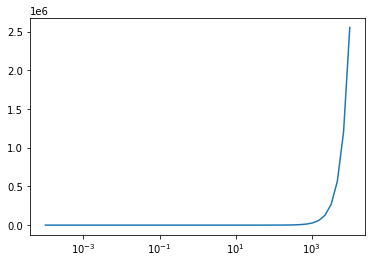

In [ ]:
f = ppt.gca()
f.plot(lamdas,cost_historyL)
f.set_xscale('log')

In [ ]:
lamdas=lamdas.reshape(50,1)
#wsR
#type(wsR) est une liste

In [ ]:
wsR1=[np.array([  0.14926966,  -3.32924262,   6.68299074,   4.70650073,
        -11.45246821,   6.70418489,   1.46790632,   2.51395827,
          9.96900528,   0.57289346]),
 np.array([  0.14960668,  -3.32866464,   6.68342373,   4.70611773,
        -11.39440116,   6.6582561 ,   1.44217572,   2.50667459,
          9.94703206,   0.57312651]),
 np.array([  0.15009199,  -3.32782977,   6.68404157,   4.70556416,
        -11.31094201,   6.5922439 ,   1.40519897,   2.4962122 ,
          9.91544405,   0.57346433]),
 np.array([  0.15078737,  -3.32662812,   6.684915  ,   4.70476665,
        -11.19168703,   6.4979205 ,   1.35237445,   2.48127577,
          9.87029504,   0.57395305]),
 np.array([  0.15177674,  -3.32490718,   6.68613303,   4.703623  ,
        -11.02270054,   6.36426589,   1.27754536,   2.46013823,
          9.8062913 ,   0.57465807]),
 np.array([  0.15317051,  -3.32245957,   6.68779805,   4.70199334,
        -10.78605562,   6.17710612,   1.17280636,   2.43059469,
          9.71660655,   0.57567127]),
 np.array([  0.15510734,  -3.3190109 ,   6.69000801,   4.69969084,
        -10.4600871 ,   5.91931648,   1.0286348 ,   2.39001568,
          9.5929563 ,   0.57711998]),
 np.array([  0.15774978,  -3.31421063,   6.6928147 ,   4.69647343,
        -10.02113773,   5.57220884,   0.83469824,   2.33560403,
          9.42622043,   0.57917815]),
 np.array([ 0.1612697 , -3.30762929,  6.69614409,  4.69203791, -9.44773744,
         5.11884908,  0.58176163,  2.26497981,  9.20796131,  0.58207979]),
 np.array([ 0.16582172, -3.29876108,  6.6996686 ,  4.68601554, -8.72770744,
         4.54969809,  0.2649151 ,  2.17715651,  8.93301747,  0.58613651]),
 np.array([ 0.17151121, -3.28701991,  6.70263802,  4.67796033, -7.86705331,
         3.86968576, -0.11238835,  2.07375224,  8.60274653,  0.59176329]),
 np.array([ 0.17837667, -3.27169867,  6.70370347,  4.66731009, -6.89685117,
         3.10372852, -0.53519446,  1.95991946,  8.22750089,  0.59952082]),
 np.array([ 0.18641474, -3.25184949,  6.70078547,  4.653292  , -5.87265346,
         2.29638223, -0.97727709,  1.84424111,  7.82629816,  0.61018446]),
 np.array([ 0.19566338, -3.22605752,  6.69100588,  4.63475284, -4.86340093,
         1.50327819, -1.40610946,  1.73714919,  7.42256982,  0.62484332]),
 np.array([ 0.20632474, -3.19212387,  6.67062687,  4.6099207 , -3.93352701,
         0.77729178, -1.79094704,  1.64830045,  7.03737403,  0.64501573]),
 np.array([ 0.21888045, -3.14671568,  6.63488814,  4.57613327, -3.12724052,
         0.15656114, -2.10999381,  1.58407832,  6.68343594,  0.6727423 ]),
 np.array([ 0.23415548, -3.08505476,  6.57767955,  4.52958017, -2.46219476,
        -0.3400067 , -2.35336226,  1.54625831,  6.36271443,  0.71058608]),
 np.array([ 0.25330953, -3.00072472,  6.49111853,  4.46511888, -1.93289123,
        -0.70965127, -2.52153845,  1.53211375,  6.0676438 ,  0.76142651]),
 np.array([ 0.2777376 , -2.88573596,  6.36524606,  4.37625824, -1.51907332,
        -0.95913984, -2.62134173,  1.53561773,  5.78435005,  0.82788221]),
 np.array([ 0.30882881, -2.73111551,  6.18817231,  4.25546075, -1.19417269,
        -1.09882497, -2.66162605,  1.54916167,  5.49617662,  0.91118551]),
 np.array([ 0.34749042, -2.52841792,  5.94709008,  4.09494661, -0.93143691,
        -1.13947854, -2.65013009,  1.56513821,  5.18688479,  1.00947383]),
 np.array([ 0.39336214, -2.27249446,  5.63056016,  3.88810789, -0.70771977,
        -1.09203803, -2.59202952,  1.57679991,  4.84360681,  1.11589256]),
 np.array([ 0.44381664, -1.96531176,  5.23214181,  3.63138827, -0.50590382,
        -0.96940975, -2.49014124,  1.57815156,  4.45950822,  1.2175671 ]),
 np.array([ 0.4932025 , -1.61943848,  4.75456645,  3.32610832, -0.31669892,
        -0.78901174, -2.34630135,  1.56318031,  4.03553021,  1.2968636 ]),
 np.array([ 0.5331273 , -1.25865859,  4.21251042,  2.97948791, -0.13963047,
        -0.57433459, -2.16320645,  1.52522257,  3.58034597,  1.33557436]),
 np.array([ 0.55438184, -0.91359829,  3.63176338,  2.60431652,  0.01785963,
        -0.35372163, -1.94603447,  1.45746022,  3.10831719,  1.32070215]),
 np.array([ 0.55008238, -0.6131729 ,  3.04429553,  2.21728445,  0.14413542,
        -0.15560343, -1.70337351,  1.35507935,  2.6364035 ,  1.2489925 ]),
 np.array([ 5.18465287e-01, -3.76074020e-01,  2.48143590e+00,  1.83652727e+00,
         2.29212109e-01, -1.68839615e-03, -1.44718050e+00,  1.21835777e+00,
         2.18150530e+00,  1.12797281e+00]),
 np.array([ 0.46371356, -0.2068611 ,  1.96837548,  1.47908578,  0.27000931,
         0.09839086, -1.19160963,  1.05466412,  1.7589098 ,  0.97339213]),
 np.array([ 0.39438581, -0.097943  ,  1.52156199,  1.15872908,  0.27205637,
         0.14785376, -0.95081026,  0.87749428,  1.38124477,  0.80456414]),
 np.array([ 0.32040787, -0.03511731,  1.14847167,  0.88436039,  0.24696741,
         0.15875918, -0.736317  ,  0.70260699,  1.05720498,  0.63947988]),
 np.array([ 0.25019865, -0.00322881,  0.84873813,  0.65930839,  0.20780815,
         0.14595184, -0.55508544,  0.54342217,  0.79035411,  0.49127201]),
 np.array([ 0.18909525,  0.01024444,  0.61609815,  0.48179233,  0.16525871,
         0.12223321, -0.4089997 ,  0.40812249,  0.57893709,  0.36690948]),
 np.array([ 0.13927015,  0.01400528,  0.44078235,  0.34639677,  0.12603356,
         0.09625672, -0.29583284,  0.2993287 ,  0.41704015,  0.26794396]),
 np.array([ 0.10057099,  0.01333231,  0.31181141,  0.24591759,  0.09321768,
         0.07267274, -0.21092448,  0.21554973,  0.29650311,  0.19233044]),
 np.array([ 0.07157046,  0.01106581,  0.21870745,  0.1729274 ,  0.06743775,
         0.05328847, -0.14877095,  0.15310569,  0.20872423,  0.13629488]),
 np.array([ 0.05039437,  0.00855634,  0.15244786,  0.12075312,  0.0480242 ,
         0.03829038, -0.10410578,  0.10766811,  0.14586337,  0.09568712]),
 np.array([ 0.03521558,  0.00634664,  0.10578514,  0.08389666,  0.03382095,
         0.02712922, -0.07243742,  0.07517351,  0.10139892,  0.06673024]),
 np.array([ 0.02447716,  0.0045869 ,  0.0731712 ,  0.05808147,  0.02363357,
         0.01903511, -0.05019967,  0.05221983,  0.07022562,  0.04631674]),
 np.array([ 0.01694956,  0.0032598 ,  0.05049869,  0.04010874,  0.01642549,
         0.01326634, -0.03469043,  0.03614584,  0.04850819,  0.03204157]),
 np.array([ 0.01170636,  0.00229105,  0.03479679,  0.02764895,  0.011373  ,
         0.00920303, -0.02392552,  0.02495758,  0.03344543,  0.022115  ]),
 np.array([ 0.00807049,  0.00159824,  0.0239511 ,  0.0190366 ,  0.00785423,
         0.00636388, -0.01647852,  0.01720278,  0.02303055,  0.0152393 ]),
 np.array([ 0.00555692,  0.00110934,  0.01647345,  0.01309586,  0.00541445,
         0.00439094, -0.01133871,  0.01184342,  0.01584485,  0.01048968]),
 np.array([ 0.00382291,  0.00076737,  0.01132446,  0.00900381,  0.00372794,
         0.00302507, -0.00779695,  0.00814703,  0.0108945 ,  0.00721486]),
 np.array([ 0.00262843,  0.00052958,  0.00778207,  0.00618791,  0.00256457,
         0.00208191, -0.00535908,  0.00560112,  0.00748762,  0.00495981]),
 np.array([ 0.00180643,  0.0003649 ,  0.00534645,  0.0042515 ,  0.00176322,
         0.00143179, -0.00368232,  0.0038493 ,  0.00514464,  0.00340836]),
 np.array([ 0.00124115,  0.00025115,  0.0036725 ,  0.00292051,  0.00121178,
         0.00098419, -0.00252964,  0.00264467,  0.0035341 ,  0.00234163]),
 np.array([ 0.0008526 ,  0.00017274,  0.00252237,  0.00200594,  0.00083257,
         0.0006763 , -0.00173754,  0.0018167 ,  0.00242742,  0.00160848]),
 np.array([ 0.0005856 ,  0.00011874,  0.00173228,  0.00137765,  0.00057192,
         0.00046461, -0.00119334,  0.00124778,  0.00166713,  0.00110474]),
 np.array([ 4.02184774e-04,  8.15959975e-05,  1.18961443e-03,  9.46086217e-04,
         3.92820585e-04,  3.19137484e-04, -8.19530321e-04,  8.56948918e-04,
         1.14489329e-03,  7.58706228e-04])]
         

In [ ]:
type(wsR1)

list

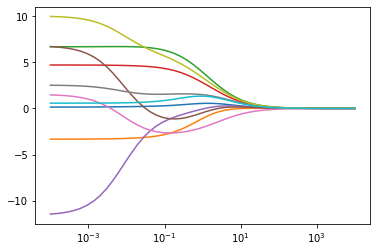

In [ ]:
f = ppt.gca()
f.plot(lamdas,wsR1)
f.set_xscale('log')

In [ ]:
w_optL

array([[ 2.09933221e-01],
       [-3.26688539e+00],
       [ 6.84564837e+00],
       [ 4.68283791e+00],
       [-4.99778125e-01],
       [-2.24781689e+00],
       [-3.11075473e+00],
       [ 1.63152248e+00],
       [ 5.72368763e+00],
       [ 5.90422747e-01],
       [-3.68058473e-03]])

In [ ]:
print(cost_function(Xtest, Ytest, w_optL))
print(l_minL)

1.1220597663737129
0.0001
